## 最短路径算法
- Floyd算法
    - 求多源、无负权边的最短路，时间复杂度$O(V^3)$，空间复杂度$O(N^2)$。Floyd-Warshall算法是解决任意两点之间的最短路径的一种算法，可以正确处理有向图或负权的最短路径问题。
- Dijkstra
    - 求单源、无负权的最短路径，时效性较好，时间复杂度为$O(V \times V+E)$。源点可达的话$O(V \times logV + E \times lgV)=O(E \times lgV)$
- 解释
    - 单源：一次性只能求解一个源点到所有其他节点的最短路径；
    - 多源：一次性可以求解所有节点两两之间的最短路径；

In [3]:
import numpy as np

In [4]:
a = np.array([[0, 12, 999, 999, 999, 16, 14], 
              [12, 0, 10,  999, 999, 7, 999],
              [999,10, 0,  3,   5,   6, 999],
              [999,999,3,  0,   4,  999,999],
              [999,999,5,  4,   0,   2, 8],
              [16, 7,  6, 999,  2,   0, 9],
              [14, 999,999,999, 8,   9, 0]])

In [5]:
a.shape
a.ndim

2

In [6]:
def floyd(arr:np.array)->np.array:
    _arr = arr.copy()
    _path = np.zeros_like(_arr)  # must init
    for i in range(0, _path.shape[0]):
        for j in range(0, _path.shape[1]):
            _path[i][j] = j
    if _arr.ndim != 2:
        raise ValueError('传入的值必须是2维!!!')
    if _arr.shape[0] != _arr.shape[1]:
        raise ValueError('传入的值必须是行数和列数相等的!!!')
    for k in range(0, _arr.shape[0]):
        for i in range(0, _arr.shape[0]):
            for j in range(0, _arr.shape[0]):
                if _arr[i][k] + _arr[k][j] < _arr[i][j]:
                    _arr[i][j] = _arr[i][k] + _arr[k][j]
                    _path[i][j] = _path[i][k]
    return _arr, _path

In [7]:
shorest_dis, path = floyd(a)

In [10]:
def visual_shorest_path(distance:np.array, path:np.array):
    for i in range(0, distance.shape[0]):
        for j in range(i + 1, distance.shape[0]):
            print('v', i, ' -- v',j, ' weight: ', distance[i][j], '\nPath: ')
            k = path[i][j]
            messages = str(i) + ' '
            while k != j:
                messages += ('-> ' + str(k) + ' ')
                k = path[k][j]
            messages += ('-> ' + str(j))
            print(messages)

In [11]:
visual_shorest_path(shorest_dis, path)

v 0  -- v 1  weight:  12 
Path: 
0 -> 1
v 0  -- v 2  weight:  22 
Path: 
0 -> 1 -> 2
v 0  -- v 3  weight:  22 
Path: 
0 -> 5 -> 4 -> 3
v 0  -- v 4  weight:  18 
Path: 
0 -> 5 -> 4
v 0  -- v 5  weight:  16 
Path: 
0 -> 5
v 0  -- v 6  weight:  14 
Path: 
0 -> 6
v 1  -- v 2  weight:  10 
Path: 
1 -> 2
v 1  -- v 3  weight:  13 
Path: 
1 -> 2 -> 3
v 1  -- v 4  weight:  9 
Path: 
1 -> 5 -> 4
v 1  -- v 5  weight:  7 
Path: 
1 -> 5
v 1  -- v 6  weight:  16 
Path: 
1 -> 5 -> 6
v 2  -- v 3  weight:  3 
Path: 
2 -> 3
v 2  -- v 4  weight:  5 
Path: 
2 -> 4
v 2  -- v 5  weight:  6 
Path: 
2 -> 5
v 2  -- v 6  weight:  13 
Path: 
2 -> 4 -> 6
v 3  -- v 4  weight:  4 
Path: 
3 -> 4
v 3  -- v 5  weight:  6 
Path: 
3 -> 4 -> 5
v 3  -- v 6  weight:  12 
Path: 
3 -> 4 -> 6
v 4  -- v 5  weight:  2 
Path: 
4 -> 5
v 4  -- v 6  weight:  8 
Path: 
4 -> 6
v 5  -- v 6  weight:  9 
Path: 
5 -> 6


In [17]:
nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
distances = {
    'B': {'A': 5, 'D': 1, 'G': 2},
    'A': {'B': 5, 'D': 3, 'E': 12, 'F' :5},
    'D': {'B': 1, 'G': 1, 'E': 1, 'A': 3},
    'G': {'B': 2, 'D': 1, 'C': 2},
    'C': {'G': 2, 'E': 1, 'F': 16},
    'E': {'A': 12, 'D': 1, 'C': 1, 'F': 2},
    'F': {'A': 5, 'E': 2, 'C': 16}
}

unvisited = {node: None for node in nodes} #using None as +inf
visited = {}
current = 'B'
currentDistance = 0
unvisited[current] = currentDistance

while True:  # 仅能执行n-1次
    for neighbour, distance in distances[current].items(): 
        if neighbour not in unvisited: continue
        newDistance = currentDistance + distance # 上一次的最小值
        if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
            unvisited[neighbour] = newDistance # 松弛
    visited[current] = currentDistance
    del unvisited[current]
    if not unvisited: break
    candidates = [node for node in unvisited.items() if node[1]]
    current, currentDistance = sorted(candidates, key = lambda x: x[1])[0] # 单次确定值

print(visited)

{'B': 0, 'D': 1, 'E': 2, 'G': 2, 'C': 3, 'A': 4, 'F': 4}


In [27]:
def dijkstra(arr:np.array, idx:int):
    distance = arr[idx,:]
    visited = {i:None for i in range(arr.shape[0])}
    visited[idx] = 0
    for i in range(1, arr.shape[0]):
        min_val = np.inf
        for j in range(0, arr.shape[0]):
            if visited[j] is None and distance[j] < min_val:
                min_val = distance[j]
                u = j
        if u is not None:
            visited[u] = min_val
        for v in range(0, arr.shape[0]):
            if distance[v] > distance[u] + arr[u][v]:
                distance[v] = distance[u] + arr[u][v]
    return visited

In [28]:
dijkstra(a, 2)

[999  10   0   3   5   6 999]


{0: 22, 1: 10, 2: 0, 3: 3, 4: 5, 5: 6, 6: 13}

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

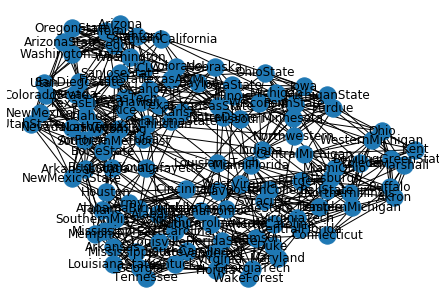

In [31]:
G = nx.read_gml('./football.gml')
nx.draw(G, with_labels=True)

In [33]:
print(nx.shortest_path(G, source='Buffalo', target='Kent'))
print(nx.shortest_path(G, source='Buffalo', target='Rice'))

['Buffalo', 'Kent']
['Buffalo', 'BowlingGreenState', 'Michigan', 'Rice']


In [35]:
# Dijkstra算法
print(nx.single_source_dijkstra_path(G, 'Buffalo'))

{'Buffalo': ['Buffalo'], 'NorthernIllinois': ['Buffalo', 'NorthernIllinois'], 'Akron': ['Buffalo', 'Akron'], 'BallState': ['Buffalo', 'BallState'], 'BowlingGreenState': ['Buffalo', 'BowlingGreenState'], 'Syracuse': ['Buffalo', 'Syracuse'], 'Connecticut': ['Buffalo', 'Connecticut'], 'Kent': ['Buffalo', 'Kent'], 'MiamiOhio': ['Buffalo', 'MiamiOhio'], 'Ohio': ['Buffalo', 'Ohio'], 'Rutgers': ['Buffalo', 'Rutgers'], 'Marshall': ['Buffalo', 'Marshall'], 'Northwestern': ['Buffalo', 'NorthernIllinois', 'Northwestern'], 'WesternMichigan': ['Buffalo', 'NorthernIllinois', 'WesternMichigan'], 'Auburn': ['Buffalo', 'NorthernIllinois', 'Auburn'], 'CentralFlorida': ['Buffalo', 'NorthernIllinois', 'CentralFlorida'], 'CentralMichigan': ['Buffalo', 'NorthernIllinois', 'CentralMichigan'], 'EasternMichigan': ['Buffalo', 'NorthernIllinois', 'EasternMichigan'], 'Toledo': ['Buffalo', 'NorthernIllinois', 'Toledo'], 'VirginiaTech': ['Buffalo', 'Akron', 'VirginiaTech'], 'KansasState': ['Buffalo', 'BallState', '

## Reference
- [1. https://cloud.tencent.com/developer/article/1012420](https://cloud.tencent.com/developer/article/1012420)
- [2. https://www.bilibili.com/video/av2156069?from=search&seid=10132934227628241348](https://www.bilibili.com/video/av2156069?from=search&seid=10132934227628241348)
- [3. https://stackoverflow.com/questions/22897209/dijkstras-algorithm-in-python](https://stackoverflow.com/questions/22897209/dijkstras-algorithm-in-python)